In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
import altair as alt
alt.renderers.enable('notebook')
opiod_df = pd.read_csv("https://raw.githubusercontent.com/rashray/Opiod-Epidemic-Project/master/data/Final_OpiodData2010_2016.csv")
opiod_df.head()

,Unnamed: 0,state,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,...,Race_Total,Male,Female,GenderTotal,0-24,25-34,35-44,45-54,55+,AgeTotal
0,1,Alabama,187,547,0.34,2010,82,34,78,0,...,177,117,70,187,24,61,43,44,15,187
1,2,Alaska,62,83,0.75,2010,38,10,25,0,...,49,32,30,49,0,12,17,20,0,62
2,3,Arizona,626,1098,0.57,2010,327,68,106,90,...,593,372,254,626,86,138,116,168,118,626
3,4,Arkansas,189,350,0.54,2010,118,57,56,0,...,177,101,88,189,30,53,47,35,24,189
4,5,California,1929,4057,0.48,2010,1063,205,456,326,...,1874,1225,704,1929,201,304,349,573,502,1929


In [4]:
byDrugMelt=pd.melt(opiod_df, id_vars=['state', 'year'], value_vars=['Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin'], var_name = ["Drug"], value_name = "TotalOpoidDeaths")
byDrugMelt.head()

,state,year,Drug,TotalOpoidDeaths
0,Alabama,2010,Oxy&Hydocodone,82
1,Alaska,2010,Oxy&Hydocodone,38
2,Arizona,2010,Oxy&Hydocodone,327
3,Arkansas,2010,Oxy&Hydocodone,118
4,California,2010,Oxy&Hydocodone,1063


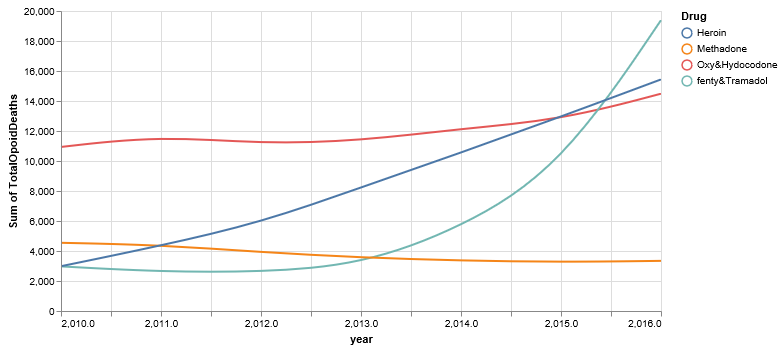

In [7]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['year'], empty='none')

# The basic line
line = alt.Chart().mark_line(interpolate='basis').encode(
    x='year',
    y='sum(TotalOpoidDeaths)',
    color='Drug:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='year',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'sum(TotalOpoidDeaths)', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='year',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text,
          data=byDrugMelt, width=600, height=300)

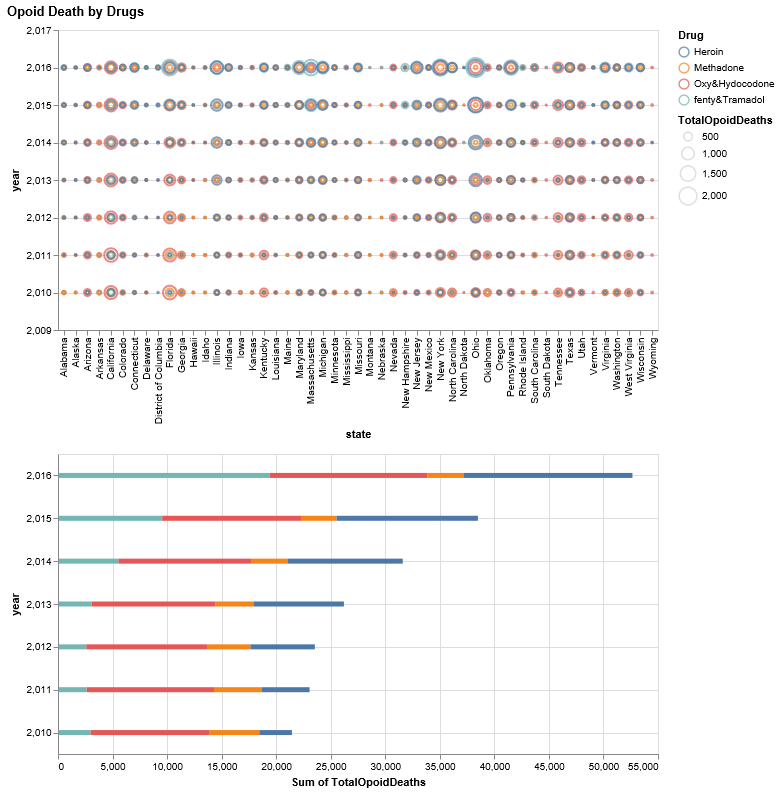

In [8]:

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])


# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    x='state',
    y=alt.Y('year', scale=alt.Scale(domain=['2009', '2017'])),
    color=alt.condition(brush, 'Drug', alt.value('lightgray')),
    tooltip=['state', 'year','TotalOpoidDeaths'],
    size='TotalOpoidDeaths'
).properties(
    width=600,
    height=300
).add_selection(
    brush
).transform_filter(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='sum(TotalOpoidDeaths)',
    y='year',
    color=alt.condition(click, 'Drug', alt.value('lightgray')),
    tooltip=['sum(TotalOpoidDeaths)', 'year','Drug']

).transform_filter(
    brush
).properties(
    width=600,
).add_selection(
    click
)

alt.vconcat(points, bars,
    data=byDrugMelt,
    title="Opoid Death by Drugs"
)

In [9]:
byDemoGraphicMelt=pd.melt(opiod_df, id_vars=['state', 'year'], value_vars=['White','Black','Hispanic'], var_name = ["Demographic"], value_name = "TotalOpoidDeaths")
byDemoGraphicMelt.head()

,state,year,Demographic,TotalOpoidDeaths
0,Alabama,2010,White,177
1,Alaska,2010,White,49
2,Arizona,2010,White,483
3,Arkansas,2010,White,177
4,California,2010,White,1442


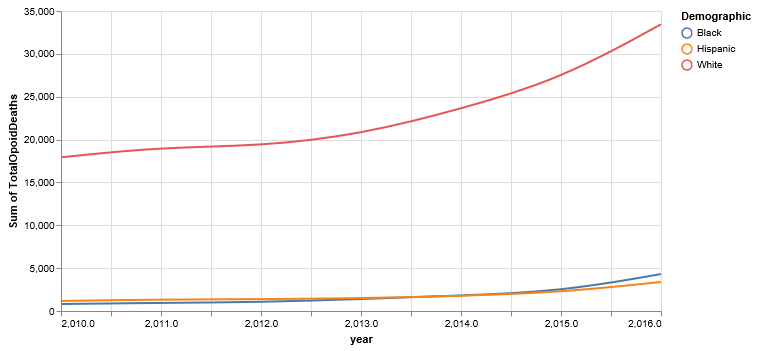

In [10]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['year'], empty='none')

# The basic line
line = alt.Chart().mark_line(interpolate='basis').encode(
    x='year',
    y='sum(TotalOpoidDeaths)',
    color='Demographic:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='year',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'sum(TotalOpoidDeaths)', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='year',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text,
          data=byDemoGraphicMelt, width=600, height=300)

In [12]:
bygenderMelt=pd.melt(opiod_df, id_vars=['state', 'year'], value_vars=['Male', 'Female'], var_name = ["Gender"], value_name = "TotalOpoidDeaths")
bygenderMelt.head()

,state,year,Gender,TotalOpoidDeaths
0,Alabama,2010,Male,117
1,Alaska,2010,Male,32
2,Arizona,2010,Male,372
3,Arkansas,2010,Male,101
4,California,2010,Male,1225


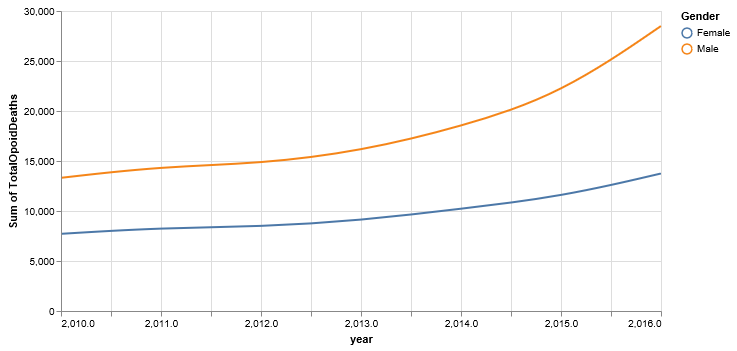

In [13]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['year'], empty='none')

# The basic line
line = alt.Chart().mark_line(interpolate='basis').encode(
    x='year',
    y='sum(TotalOpoidDeaths)',
    color='Gender:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='year',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'sum(TotalOpoidDeaths)', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='year',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text,
          data=bygenderMelt, width=600, height=300)

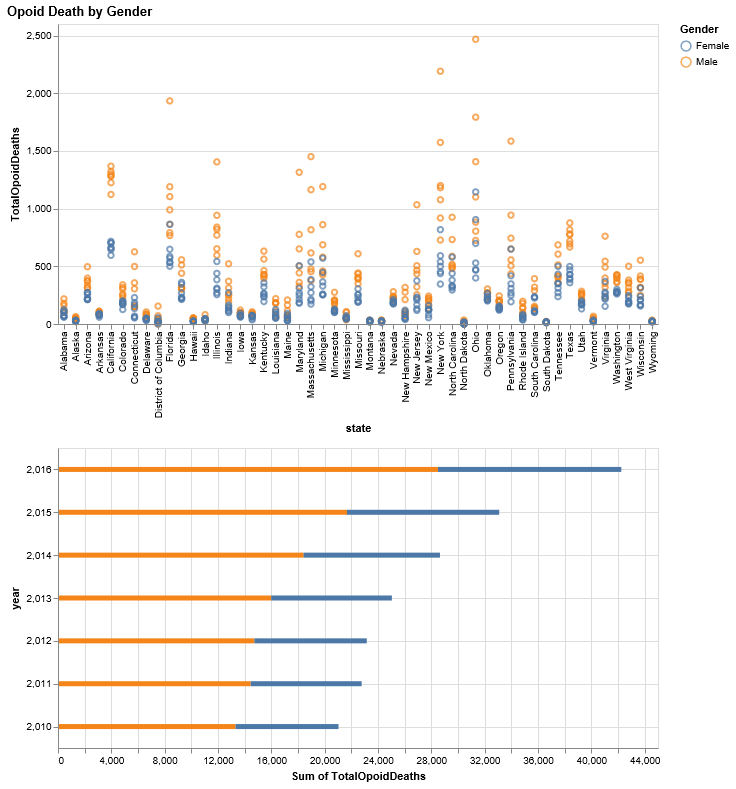

In [14]:

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])


# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    x='state',
    y='TotalOpoidDeaths',
    color=alt.condition(brush, 'Gender', alt.value('lightgray')),
    tooltip=['state', 'year','TotalOpoidDeaths']
).properties(
    width=600,
    height=300
).add_selection(
    brush
).transform_filter(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='sum(TotalOpoidDeaths)',
    y='year',
    color=alt.condition(click, 'Gender', alt.value('lightgray')),
    tooltip=['sum(TotalOpoidDeaths)', 'year','Gender']

).transform_filter(
    brush
).properties(
    width=600,
).add_selection(
    click
)

alt.vconcat(points, bars,
    data=bygenderMelt,
    title="Opoid Death by Gender"
)

In [15]:
byageMelt=pd.melt(opiod_df, id_vars=['state', 'year'], value_vars=['0-24', '25-34', '35-44', '45-54', '55+'], var_name = ['Age'], value_name = 'TotalOpoidDeaths')
byageMelt.head()

,state,year,Age,TotalOpoidDeaths
0,Alabama,2010,0-24,24
1,Alaska,2010,0-24,0
2,Arizona,2010,0-24,86
3,Arkansas,2010,0-24,30
4,California,2010,0-24,201


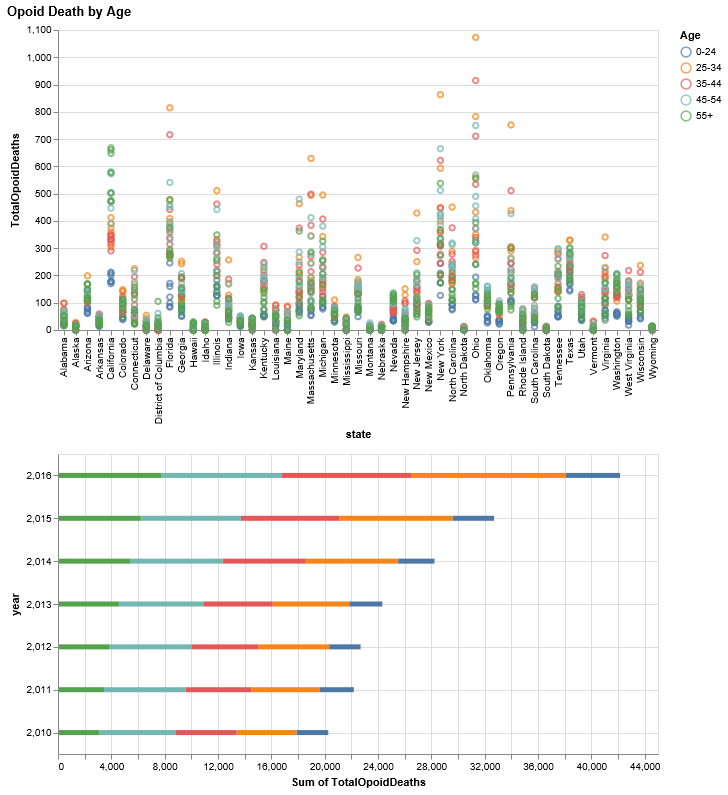

In [16]:

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])


# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    x='state',
    y='TotalOpoidDeaths',
    color=alt.condition(brush, 'Age', alt.value('lightgray')),
    tooltip=['state', 'year','TotalOpoidDeaths']
).properties(
    width=600,
    height=300
).add_selection(
    brush
).transform_filter(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='sum(TotalOpoidDeaths)',
    y='year',
    color=alt.condition(click, 'Age', alt.value('lightgray')),
    tooltip=['sum(TotalOpoidDeaths)', 'year','Age']

).transform_filter(
    brush
).properties(
    width=600,
).add_selection(
    click
)

alt.vconcat(points, bars,
    data=byageMelt,
    title="Opoid Death by Age"
)